In [2]:
import datetime
import numpy as np
import pandas as pd
print(pd.__version__)

1.3.5


In [156]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2022, 1, 1)
# Create a DatetimeIndex with freq='Q'
# the 'Q' indicates the last day of each quarter
ts = pd.date_range(start, end, freq='M')


In [157]:
df = pd.DataFrame(index=ts.to_period('M'), data={'Quarter':ts.to_period('Q')})

In [158]:
# make a sine wave as data
df['Data'] = np.sin(np.linspace(0,10, len(ts)))

In [159]:
df['pct'] = df.groupby(by='Quarter')['Data'].transform(lambda x: x/sum(x))
df['cumpct'] = df.groupby(by='Quarter')['Data'].transform(lambda x: np.cumsum(x)/sum(x))
df['qtrTot'] = df.groupby(by='Quarter')['Data'].transform(lambda x: x.sum())

In [160]:
df.head()

,Quarter,Data,pct,cumpct,qtrTot
2020-01,2020Q1,0.000000,0.000000,0.000000,1.185262
2020-02,2020Q1,0.421213,0.355376,0.355376,1.185262
2020-03,2020Q1,0.764049,0.644624,1.000000,1.185262
2020-04,2020Q2,0.964712,0.347751,0.347751,2.774149
2020-05,2020Q2,0.985865,0.355376,0.703126,2.774149


In [161]:
# We can do a shift of 3 months for our cumulative percent for the previous quarter
df['prev_qtr_pct'] = df.cumpct.shift(3)
# then divide it to apply the prediction
df['prev_qtr_linearity'] = df['Data'] / df['prev_qtr_pct']

In [162]:
# calculate the delta
df['delta'] = (df['prev_qtr_linearity']/df['qtrTot']) -1
# filter on month1/month2
scores = df.query('cumpct!=1 & delta.notna() & delta <=10000').delta

In [163]:
# MAPE:
np.abs(scores).mean()

1.1399068142684166

<AxesSubplot:>

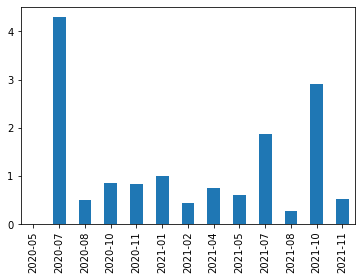

In [164]:
np.abs(scores).plot(kind='bar')

<AxesSubplot:xlabel='Quarter'>

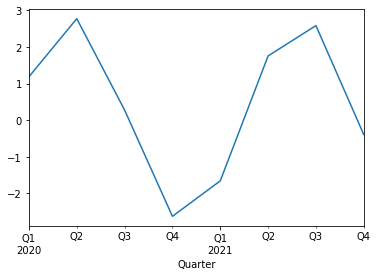

In [67]:
df.groupby(by='Quarter').sum()['Data'].plot()